### PyBer Ride Sharing Analysis

* Point 1

* Point 2

* Point 3
---

In [7]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyberCombined_df = pd.merge(city_data, ride_data, on ="city", how = "outer")

# Display the data table for preview
#pyberCombined_df.head()

# Check for any empty cells and total records
#pyberCombined_df.count()

## Bubble Plot of Ride Sharing Data

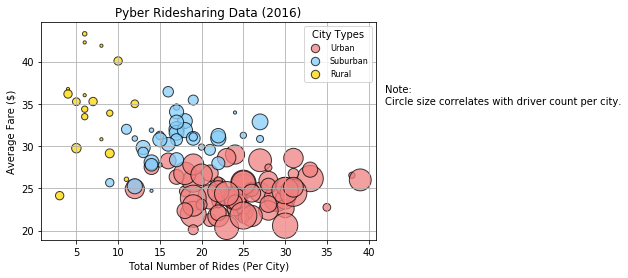

In [8]:
#Create data frames and group cities by urban, suburban and rural
urban = pyberCombined_df[pyberCombined_df["type"] == "Urban"].groupby([pyberCombined_df["city"]])
suburban = pyberCombined_df[pyberCombined_df["type"] == "Suburban"].groupby([pyberCombined_df["city"]])
rural = pyberCombined_df[pyberCombined_df["type"] == "Rural"].groupby([pyberCombined_df["city"]])

#Urban ride count, average fair, and average driver count
x_urban = urban["ride_id"].count()
y_urban = urban["fare"].mean()
s_urban = urban["driver_count"].mean()

#Suburban ride count, average fair, and average driver count
x_suburban = suburban["ride_id"].count()
y_suburban = suburban["fare"].mean()
s_suburban = suburban["driver_count"].mean()

#Rural ride count, average fair, and average driver count
x_rural = rural["ride_id"].count()
y_rural = rural["fare"].mean()
s_rural = rural["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, label = "Urban", s=s_urban * 10, color=["lightcoral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=s_suburban  * 10, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, label = "Rural", s=s_rural * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties
#plt.xlim(0,50)
#plt.ylim(15,45)
plt.title("Pyber Ridesharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best")
legend.legendHandles[0]._sizes = [70]
legend.legendHandles[1]._sizes = [70]
legend.legendHandles[2]._sizes = [70]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("Images/Pyber_Ride_Sharing_Data.jpg", bbox_inches="tight")

# Show plot
plt.show()

## Total Fares by City Type

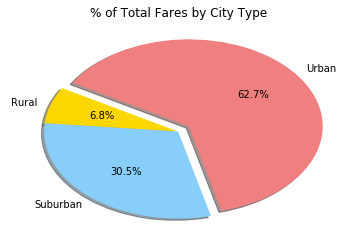

In [9]:
# Calculate Type Percents
type_group = pyberCombined_df.groupby(["type"])
fare_total = type_group["fare"].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(fare_total, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/Pyber_Total_Fares.jpg")

# Show Figure
plt.show()

## Total Rides by City Type

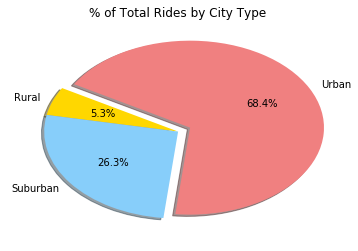

In [10]:
# Calculate Ride Percents
ride_total = type_group["ride_id"].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(ride_total, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Images/Pyber_Total_Rides.jpg")

# Show Figure
plt.show()

## Total Drivers by City Type

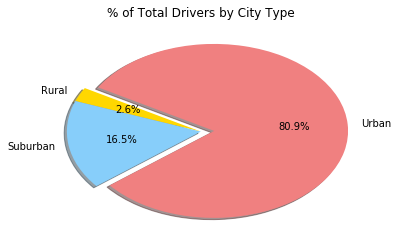

In [11]:
# Calculate Driver Percents
type_group_drivers = city_data.groupby(["type"])
drivers_total = type_group_drivers["driver_count"].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(drivers_total, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Images/Pyber_Total_Drivers.jpg")

# Show Figure
plt.show()